In [0]:
#importing important libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importing the required libraries for forecasting using the facebook prophet algorithm
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [0]:
#importing the dataset of stocks of apple in the city of new york
data = pd.read_csv('apple_data.csv')

In [4]:
#getting an idea of the datapoints of apple stocks
data.head(5)

,date,symbol,open,close,low,high,volume,close - open,eps ratio,pe ratio
0,06-04-2015,AAPL,124.470001,127.349998,124.330002,127.510002,37194000,2.879997,7.740000e-08,1.646740e+09
1,16-11-2015,AAPL,111.379997,114.180000,111.000000,114.239998,38106700,2.800003,7.350000e-08,1.554752e+09
2,09-12-2014,AAPL,110.190002,114.120003,109.349998,114.300003,60208000,3.930001,6.530000e-08,1.751087e+09
3,04-12-2015,AAPL,115.290001,119.029999,115.110001,119.250000,57777000,3.739998,6.470000e-08,1.842222e+09
4,10-08-2015,AAPL,116.529999,119.720001,116.529999,119.989998,54951600,3.190002,5.810000e-08,2.066971e+09


In [0]:
#preparing the dataset to be put through the algorithm
#it is necessary that datetime be named ds and the value to be predicted named y
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])
df['y'] = data['close']

In [6]:
#feeding the dataset created to the prophet time series 
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
#making few prediction to see if everything is working, printing out the predicted datapoints from the end of the dataset
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
1575,2021-08-31
1576,2021-09-30
1577,2021-10-31
1578,2021-11-30
1579,2021-12-31


In [8]:
#setting out the parameters to predict and forecasting
#yhat column is the predicted value
#yhat_lower and yhat_upper columns shows the uncertainity interval
#There are three sources of uncertainty in the forecast: uncertainty in the trend, uncertainty in the seasonality estimates, and additional observation noise.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1575,2021-08-31,221.708278,-11.054301,440.955880
1576,2021-09-30,221.266902,-12.322990,443.118766
1577,2021-10-31,224.379553,-14.217502,456.533939
1578,2021-11-30,224.647819,-20.339616,456.809113
1579,2021-12-31,231.634005,-13.324370,470.994810


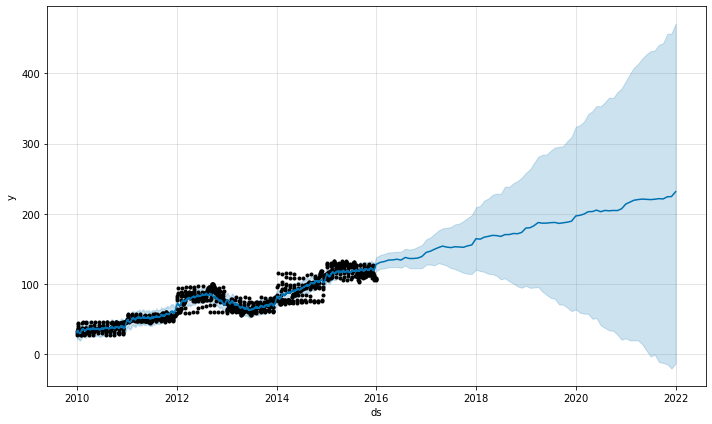

In [9]:
#plotting out the results of forecast
fig1 = m.plot(forecast)

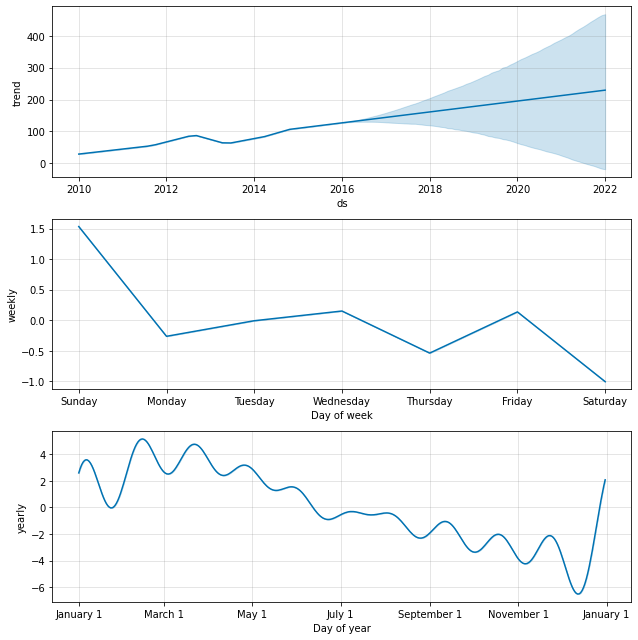

In [10]:
#plotting out the components of the forecast namely, trend, weekly, yearly
fig2 = m.plot_components(forecast)

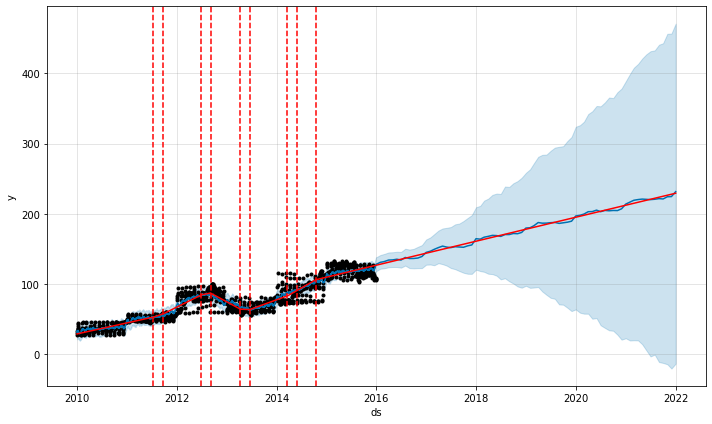

In [11]:
#real time series frequently have abrupt changes in their trajectories.
#By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.
#However, if finer control over this process is required,
#then there are several input arguments you can use.
fig = m.plot(forecast)
#adding changepoints
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


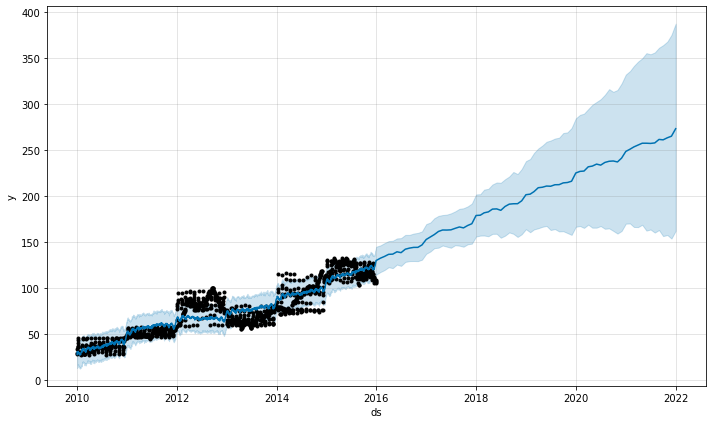

In [12]:
#fine tuning the changepoints
m = Prophet(n_changepoints=3).fit(df)
#predicting for 6 years and each year include 12 months so the period is 12 * 6
future = m.make_future_dataframe(periods=12 * 6, freq='M')
#inputting the parameters created and forecasting on the basis of them
forecast = m.predict(future)
#plots out the forecast data
fig = m.plot(m.predict(future))

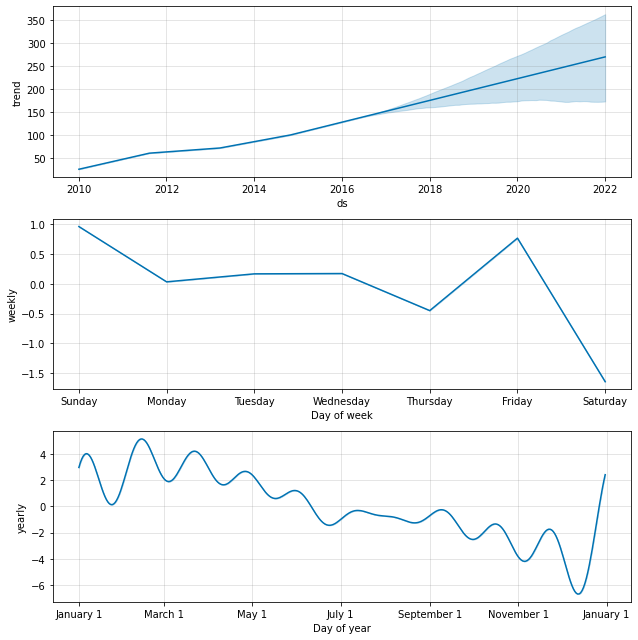

In [13]:
#plots out the different components and trends of the forecast done by the algorithm
fig2 = m.plot_components(forecast)

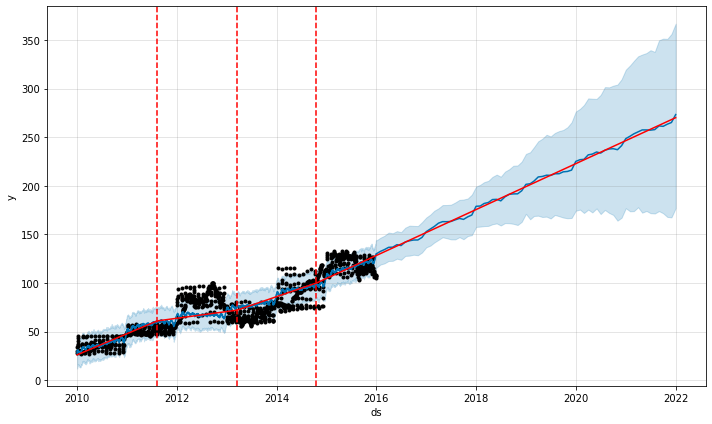

In [14]:
#adding more changeplots so as to have a finer control over the abrupt changes in the time series
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


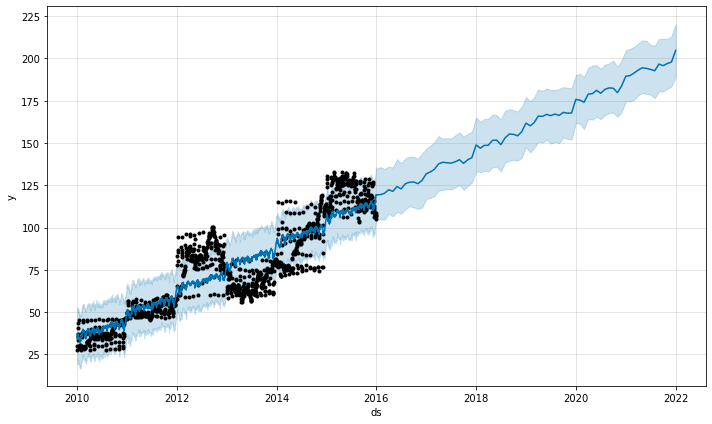

In [15]:
#increasing the changepoints prior scale will decrease the uncertainity in the time series
m = Prophet(changepoint_prior_scale=0.001).fit(df)#setting the prior scale to be 0.001
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
#plotting the forecast plots
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


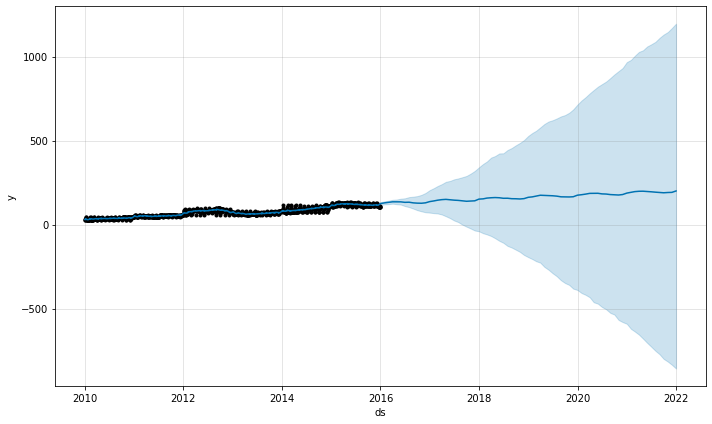

In [16]:
m = Prophet(changepoint_prior_scale=0.5).fit(df)#increasing the prior scale to 0.5 to see the changes in uncertainity
future = m.make_future_dataframe(periods=12 * 6, freq='M') #M means monthly
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


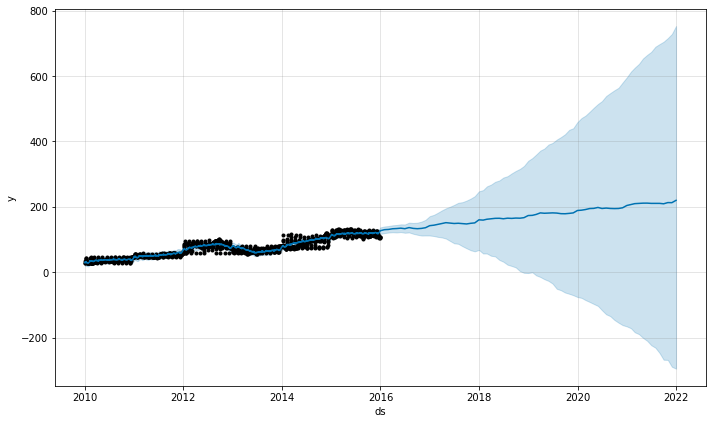

In [17]:
m = Prophet(changepoint_prior_scale=0.5, n_changepoints=7).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

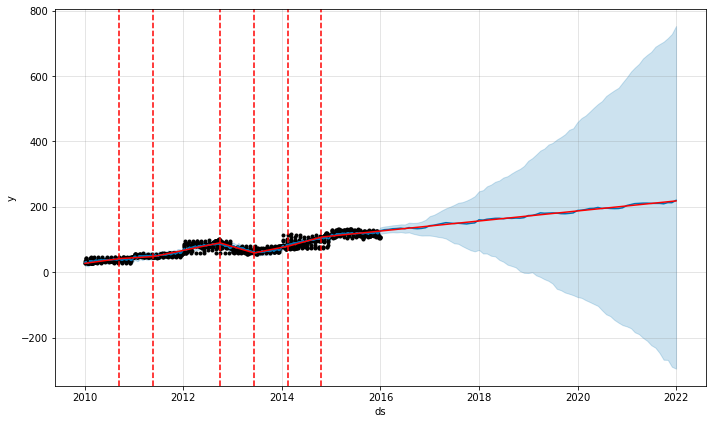

In [18]:
#adding all the changepoints to the plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [19]:
#validating the dataset with a cutoff from the dataset 
#validating the data from the error in the last 365 days predicted
#cutoff are the days that are removed from the dataset for cross validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2012-01-16 00:00:00 and 2014-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-17,73.171864,67.929959,78.486693,60.671429,2012-01-16
1,2012-01-18,72.223251,67.039664,77.023157,61.301430,2012-01-16
2,2012-01-19,72.436882,67.303155,77.214024,61.107143,2012-01-16
3,2012-01-20,71.923507,66.861369,76.615188,60.042858,2012-01-16
4,2012-01-23,71.830044,67.055239,76.733345,61.058571,2012-01-16


In [20]:
#getting the metrics like mean square error, root mean squared error
#these metrics define the performance of the prediction model created
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,106.391878,10.314644,8.566777,0.106882,0.091374,0.457143
1,38 days,113.367456,10.647415,8.790698,0.108055,0.091892,0.451429
2,39 days,114.901395,10.719207,8.830160,0.108027,0.091739,0.457143
3,40 days,115.772337,10.759755,8.858988,0.108482,0.091739,0.457143
4,41 days,116.171005,10.778265,8.866311,0.109648,0.091739,0.453714


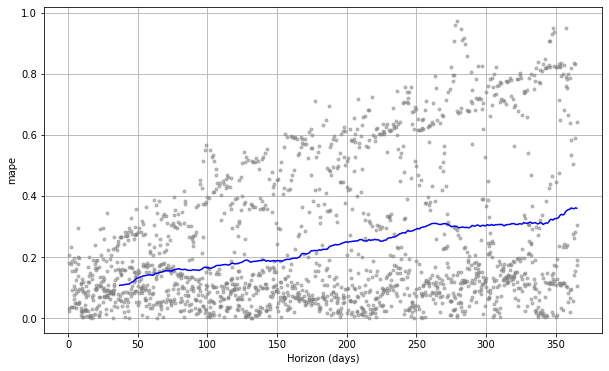

In [21]:
#through mape plot we can see that the prediction error at first is less than 5% and then increases to about 5%
fig = plot_cross_validation_metric(df_cv, metric='mape')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


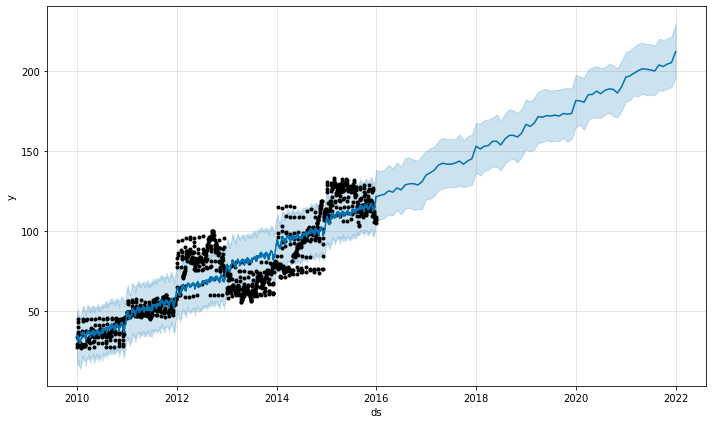

In [22]:
m = Prophet(changepoint_prior_scale=.001, n_changepoints=0).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 8


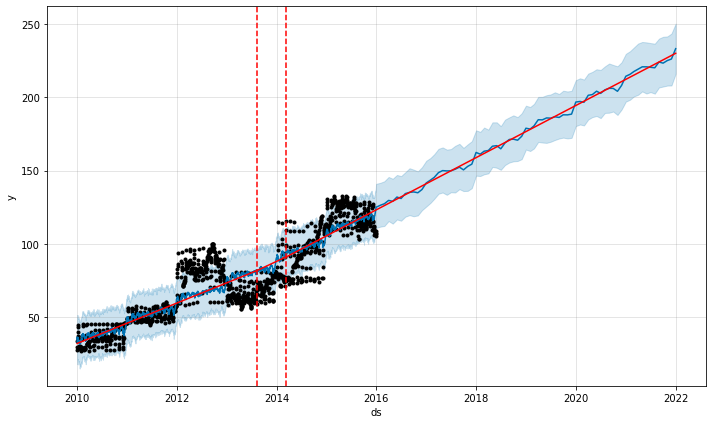

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


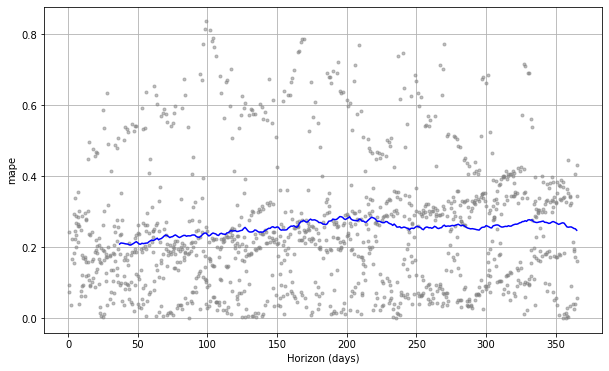

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 10


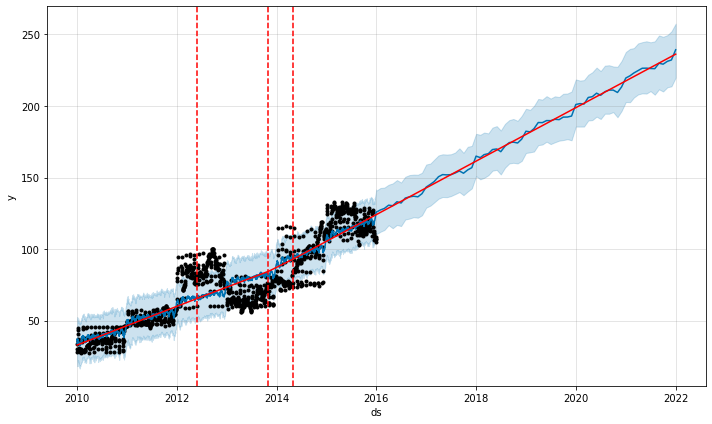

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


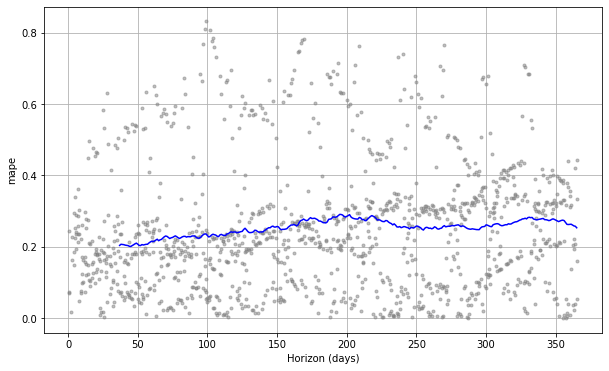

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 15


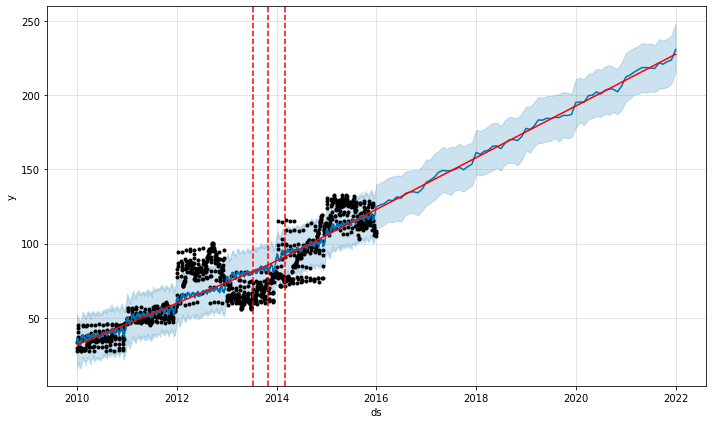

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


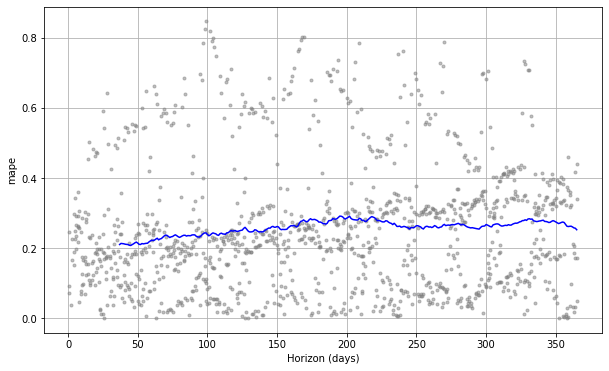

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 20


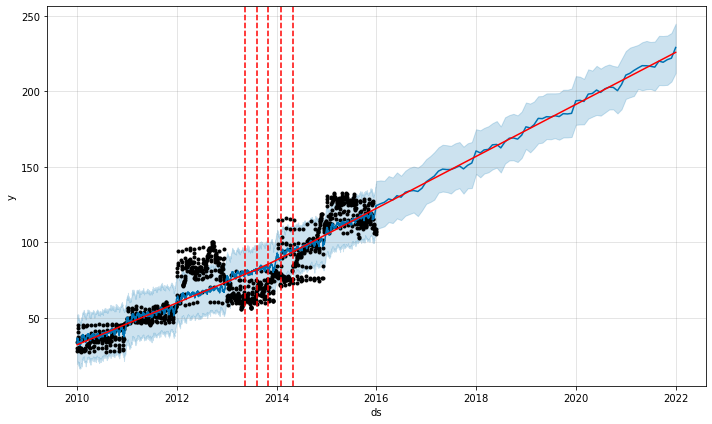

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


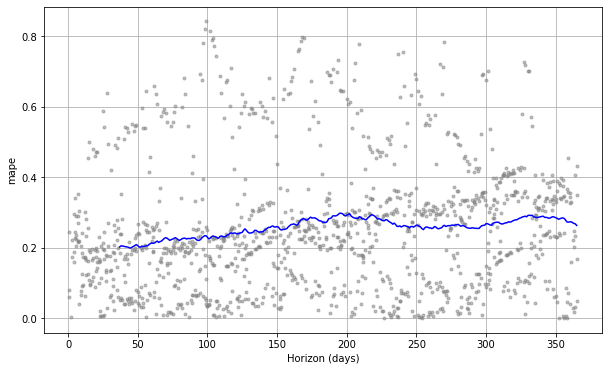

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 25


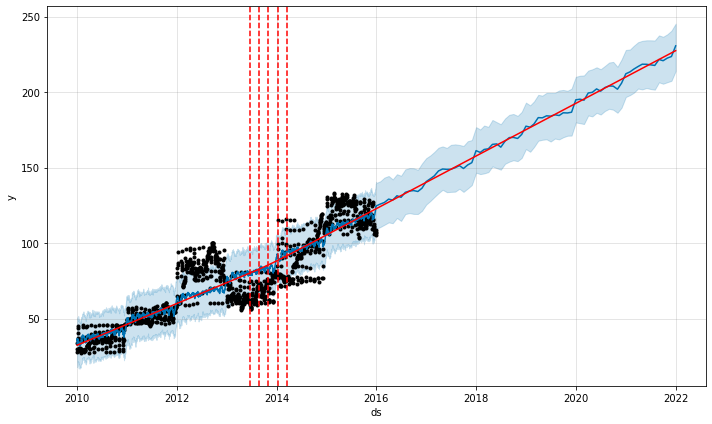

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


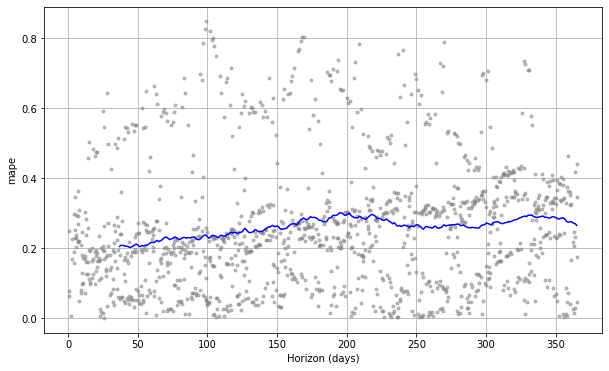

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 8


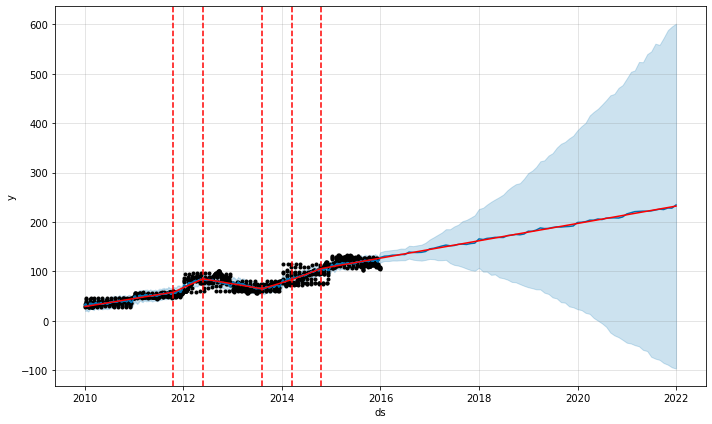

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


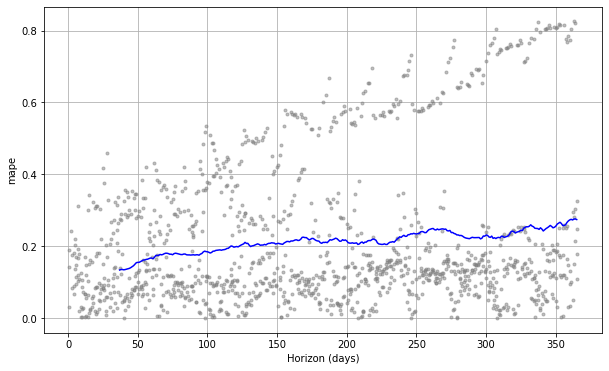

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 10


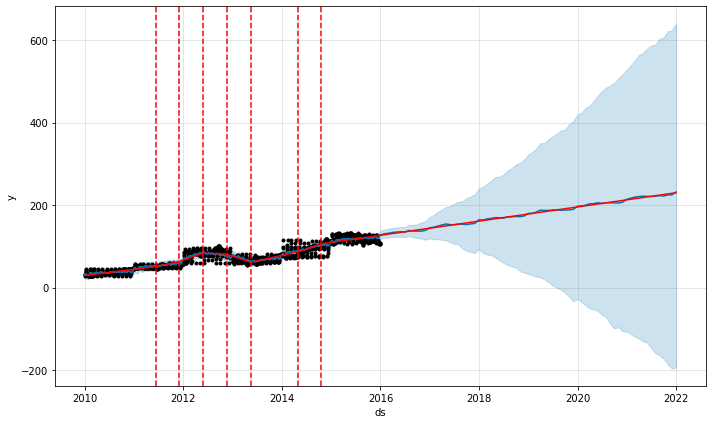

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


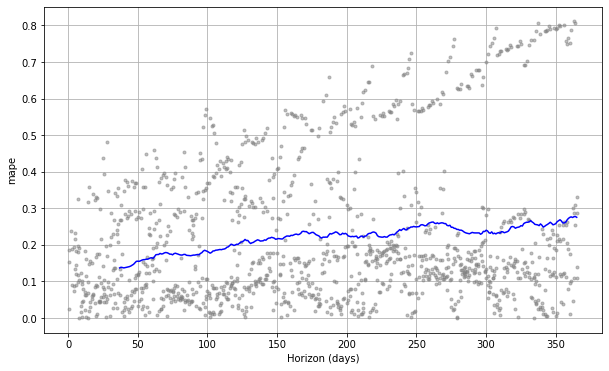

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 15


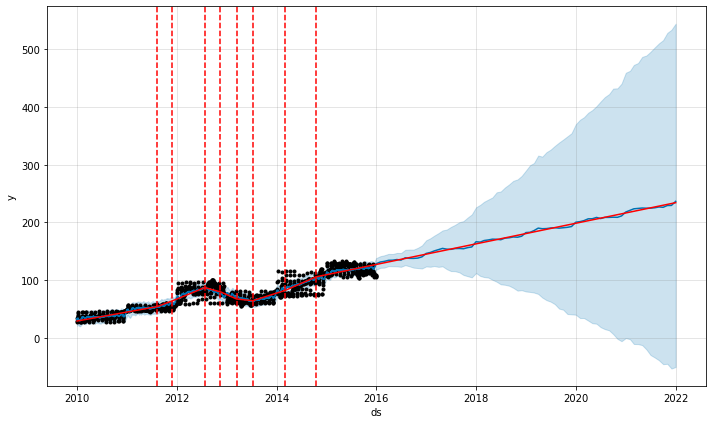

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


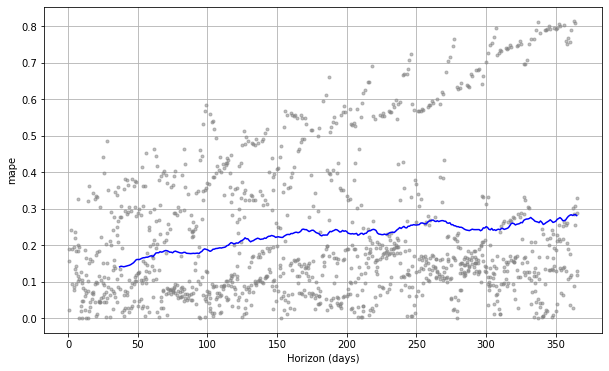

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 20


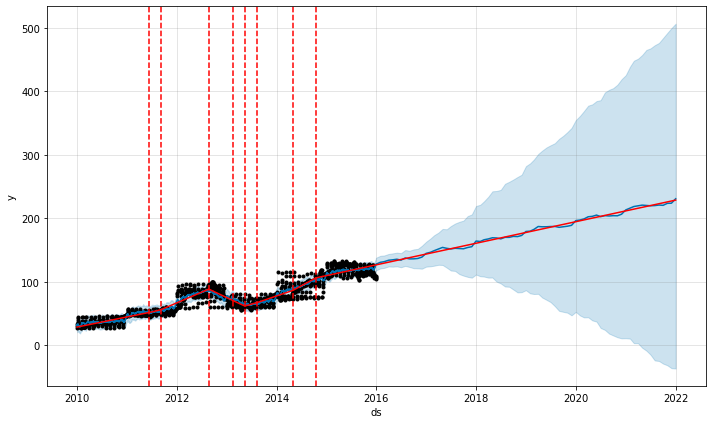

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


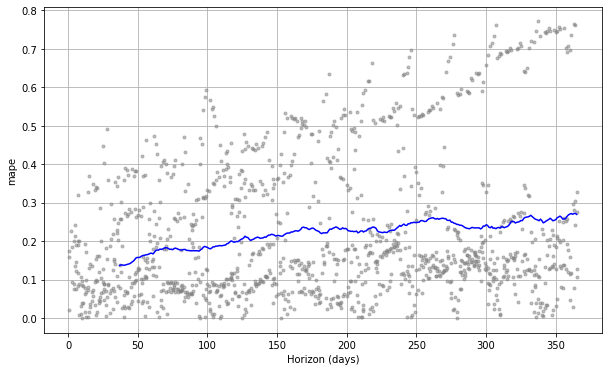

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 25


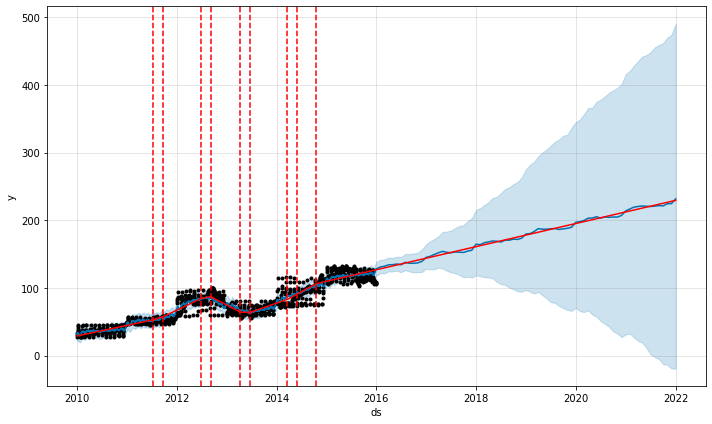

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


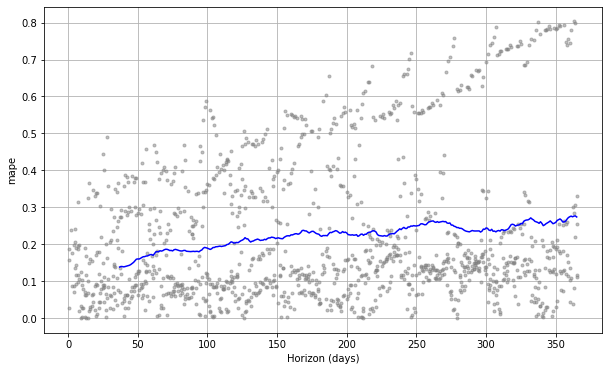

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 8


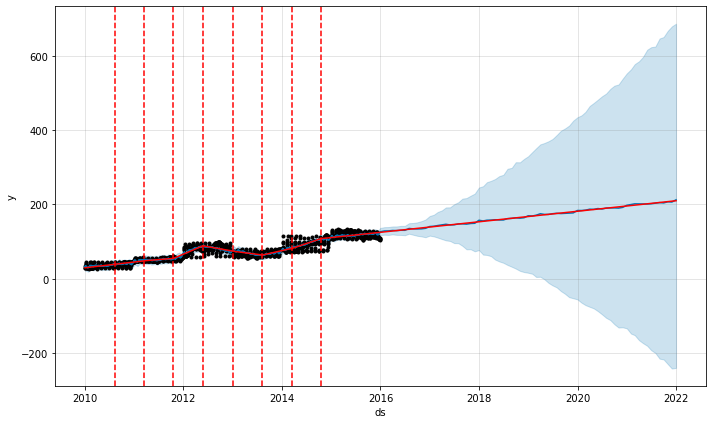

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


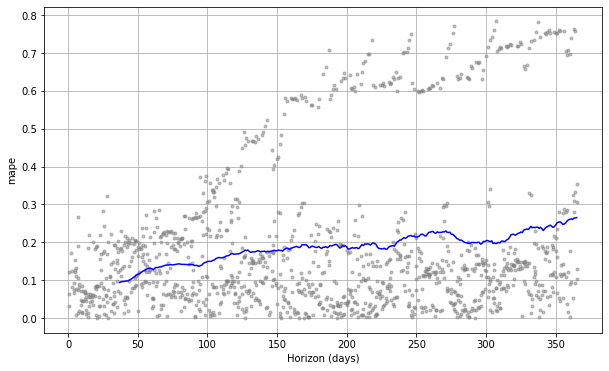

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 10


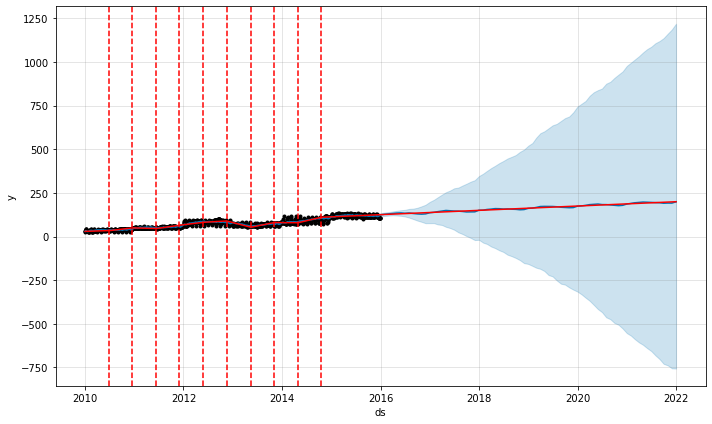

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


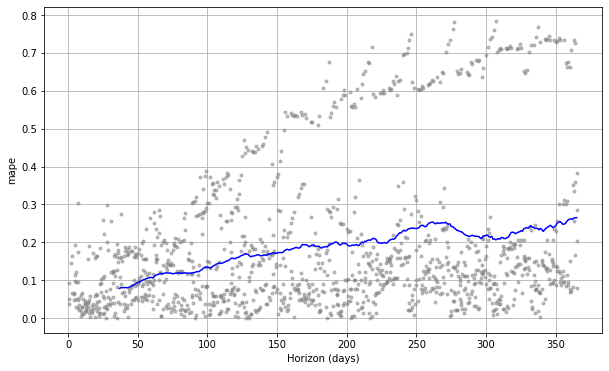

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 15


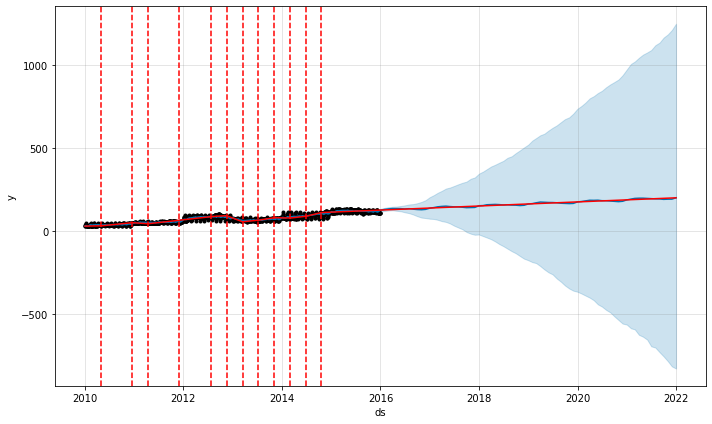

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


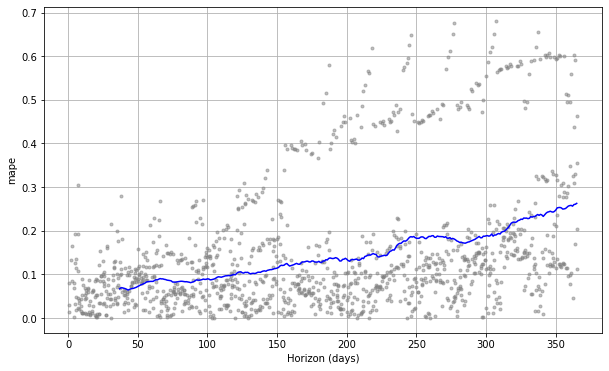

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 20


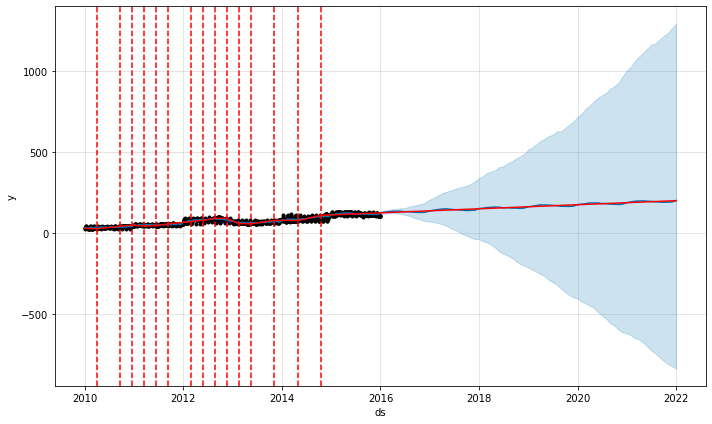

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


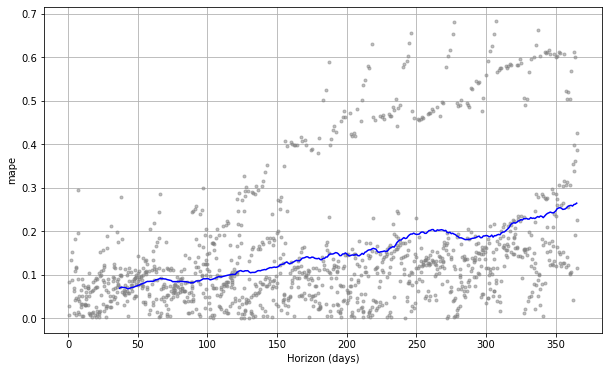

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 25


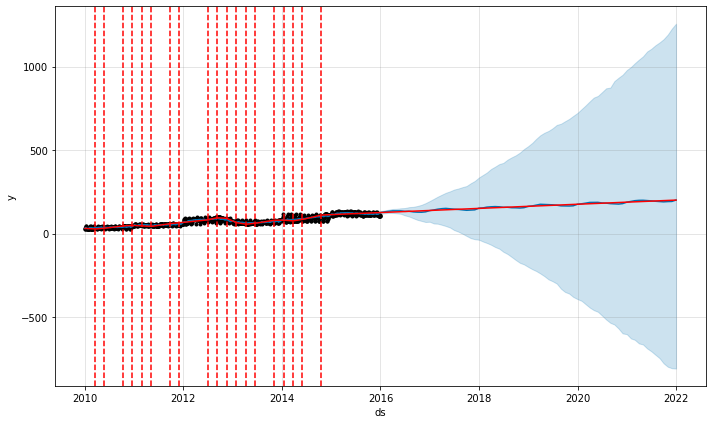

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


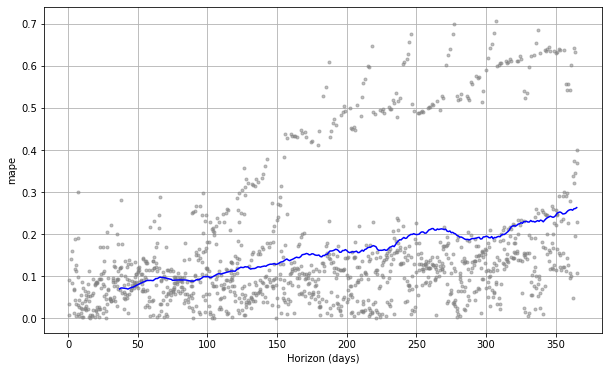

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 8


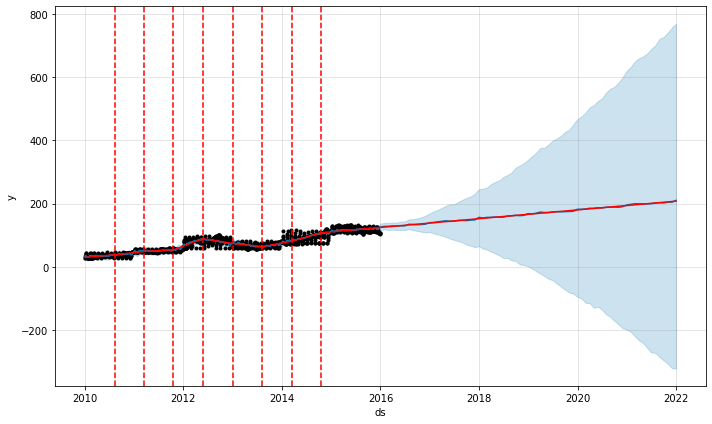

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


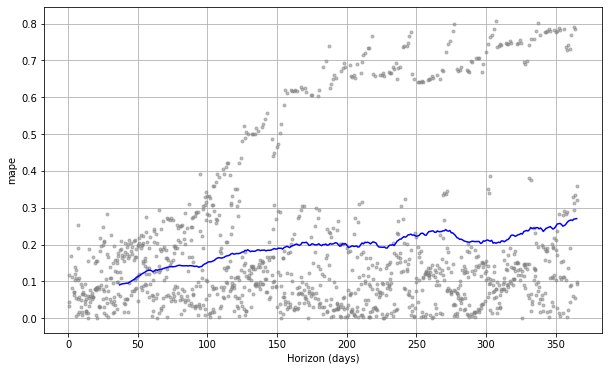

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 10


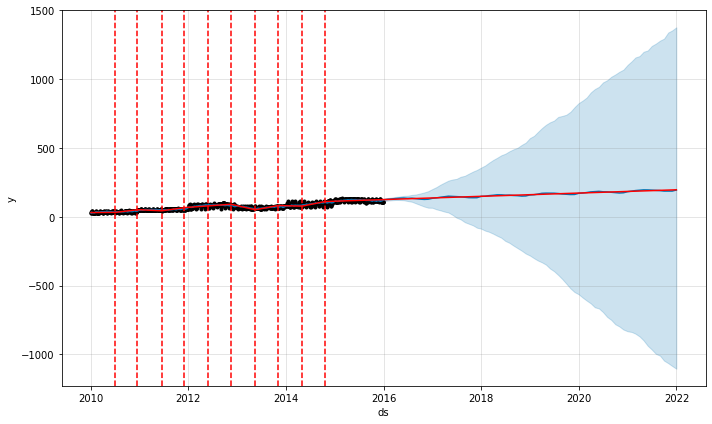

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


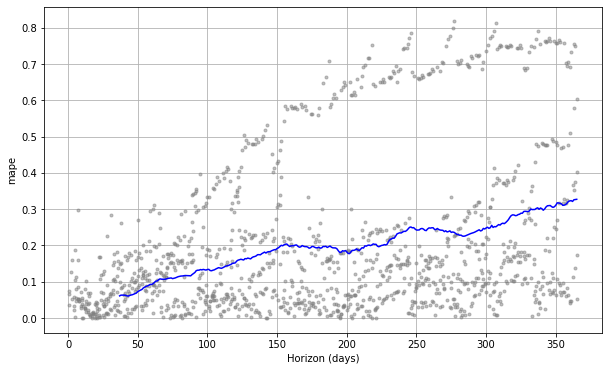

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 15


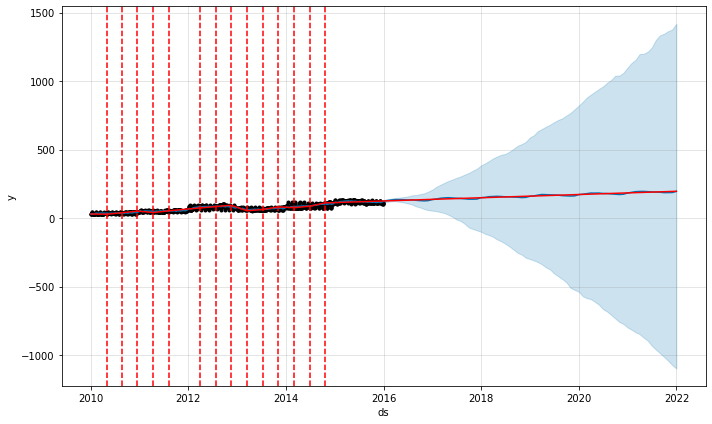

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


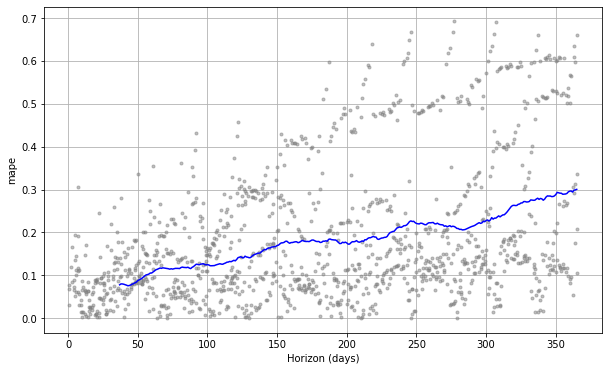

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 20


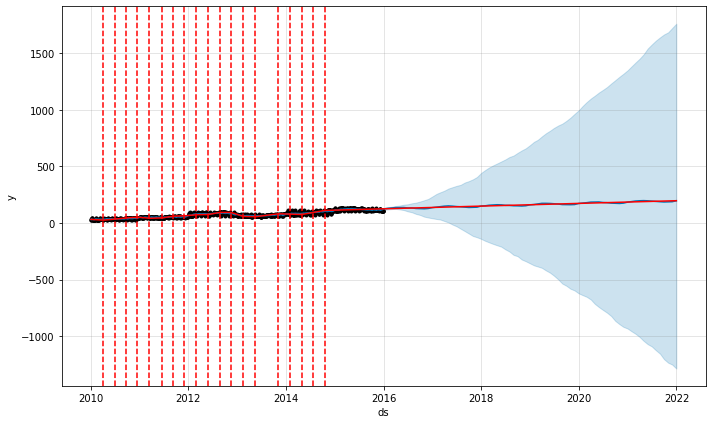

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


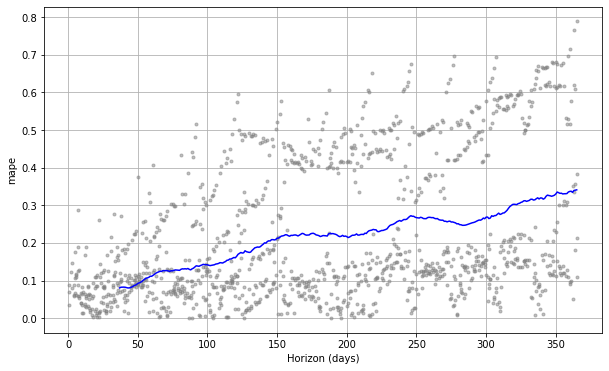

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 25


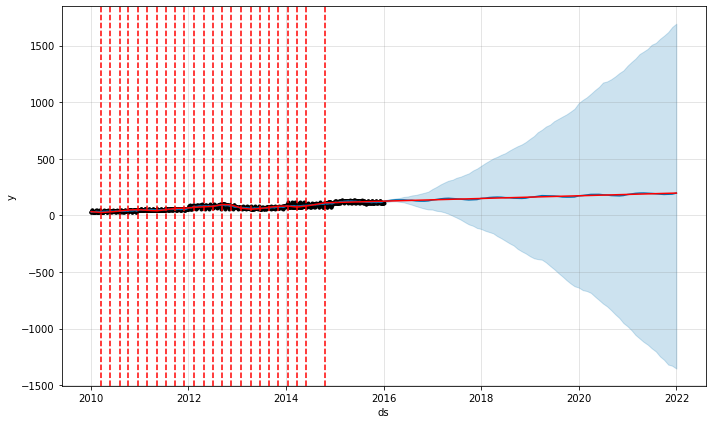

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


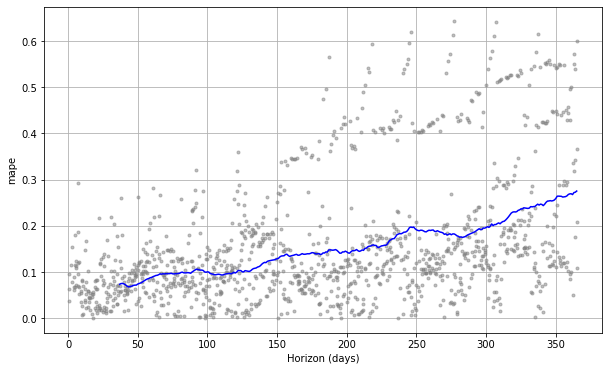

In [23]:
#plotting the different changepoints scales and different numbers of changepoints
changepoint_prior_scales = [.005, .05, .5, 2]
n_changepoints = [8, 10, 15, 20, 25]
#creating an array of rmse
rmse = []
#for loop for looping through the differnt changepoint prior scales
for changepoint_prior_scale in changepoint_prior_scales:
    #for loop for looping through the number of changepoints
    for n_changepoint in n_changepoints:
        print('Changepoint Prior Scale:', changepoint_prior_scale)#prints which changepoint
        print('Number Changepoints:', n_changepoint)#prints the number of changepoint
        m = Prophet(changepoint_prior_scale=changepoint_prior_scale, n_changepoints=n_changepoint).fit(df)#fits the parameters to the algorithm
        future = m.make_future_dataframe(periods=12 * 6, freq='M')#defining the prediction periods
        forecast = m.predict(future)
        fig = m.plot(forecast)#plotting of the forecasting 
        a = add_changepoints_to_plot(fig.gca(), m, forecast)#adding the changepoints to the gca plot
        plt.show()
        df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')#validates the prediction over the period of 365 days
        df_p = performance_metrics(df_cv)#aadding the performance metrics 
        rmse.append((df_p['rmse'].mean(), {'changepoint_prior_scale': changepoint_prior_scale, 'n_changepoint': n_changepoint}))
        fig = plot_cross_validation_metric(df_cv, metric='mape')#plotting the cross validation using the mape metric
        plt.show()

In [0]:
#printing out the new rmse value for the predicted dataset

In [25]:
rmse

[(26.29185921295113, {'changepoint_prior_scale': 0.005, 'n_changepoint': 8}),
 (26.31332009060395, {'changepoint_prior_scale': 0.005, 'n_changepoint': 10}),
 (26.709330809718313, {'changepoint_prior_scale': 0.005, 'n_changepoint': 15}),
 (26.847319345287474, {'changepoint_prior_scale': 0.005, 'n_changepoint': 20}),
 (26.99136159411103, {'changepoint_prior_scale': 0.005, 'n_changepoint': 25}),
 (23.338286749803643, {'changepoint_prior_scale': 0.05, 'n_changepoint': 8}),
 (23.628581576190705, {'changepoint_prior_scale': 0.05, 'n_changepoint': 10}),
 (24.01801054580016, {'changepoint_prior_scale': 0.05, 'n_changepoint': 15}),
 (23.036443365356217, {'changepoint_prior_scale': 0.05, 'n_changepoint': 20}),
 (23.544029384819453, {'changepoint_prior_scale': 0.05, 'n_changepoint': 25}),
 (21.87555154658948, {'changepoint_prior_scale': 0.5, 'n_changepoint': 8}),
 (21.411280197467587, {'changepoint_prior_scale': 0.5, 'n_changepoint': 10}),
 (17.433598244260367, {'changepoint_prior_scale': 0.5, 'n

In [0]:
#dataframe of annual US Public Holidays over training and forecasting periods 
#creating a dataset of holidays so as to reduce the anomalies
ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2016-01-01', '2017-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2016-01-18', '2017-01-16'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2016-05-30', '2017-05-29'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2015-09-07', '2016-09-05', '2017-09-04'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2015-10-12', '2016-10-10', '2017-10-09'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2015-11-11', '2016-11-11', '2017-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2015-11-26', '2016-11-24'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2015-12-25', '2016-12-25'])})

holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ])

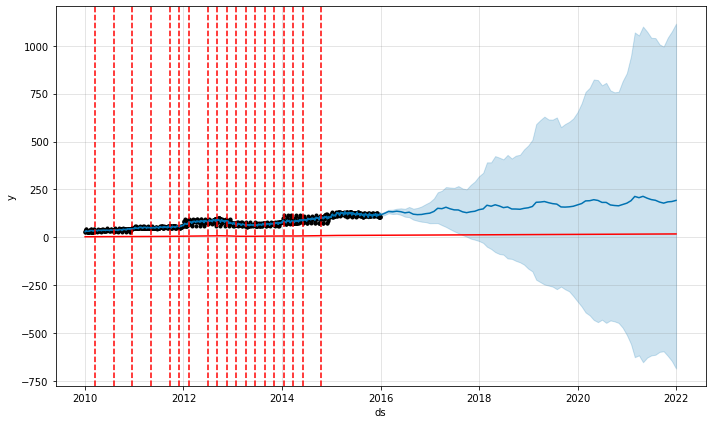

INFO:fbprophet:Making 5 forecasts with cutoffs between 2013-01-10 00:00:00 and 2014-12-31 00:00:00


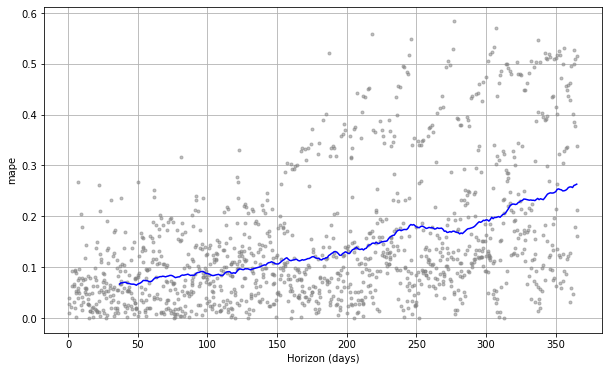

In [27]:
#defining the growth, seasonalities, changepoint prior scales, holidays
prophet = Prophet(growth='linear',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  holidays=holidays,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                  ).add_seasonality(name='quarterly',
                                    period=365.25 / 4,fourier_order=15
                  )
prophet.fit(df)# fits the model to the algorithm
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')#defining the period of prediction
forecast = prophet.predict(future)#forecasting
fig = prophet.plot(forecast)#creating a figure of forecast
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')#cross validating the data
df_p = performance_metrics(df_cv)#adding the performance metrics to the plot
fig = plot_cross_validation_metric(df_cv, metric='mape')#plotting the cross validation performance metric by mape
plt.show()